# Hybrid - Part 6: Testing Set Results

**Environment Setup**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install xgboost
!pip install spacy
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, classification_report
import functions


         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.                  

• Project files and data should be stored in /project. This is shared among everyone
  in the project.
• Personal files and configuration should be stored in /home/faculty.
• Files outside /project and /home/faculty will be lost when this server is terminated.
• Create custom environments to setup your servers reproducibly.


         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.       

In [2]:
#Model evaluation function: containing training the model, fit the dataset with classification and confusion reports
def model_evaluation(train,test,finalmodel):
    finalmodel.fit(train,y_train)
    predict_test = finalmodel.predict(test)
    functions.confusion_final(predict_test,y_test)

In [15]:
#Load training and testing sets
Train = pd.read_csv(r'Train_hybrid_updated.csv',low_memory=False,encoding='latin1')
Test = pd.read_csv(r'Test_hybrid_updated.csv',low_memory=False,encoding='latin1')

## 1. Testing Set Result Before Feature Selection

In [16]:
#Prepare Final DataFrame and get the X, y for training and testing respectively
Train.index = Train['Unnamed: 0'].values
Train = functions.drop_column(Train,'Unnamed: 0')
Test.index = Test['Unnamed: 0'].values
Test = functions.drop_column(Test,'Unnamed: 0')
X_train = Train.iloc[:,:-1]
X_test = Test.iloc[:,:-1]
y_train = Train.iloc[:,-1]
y_test = Test.iloc[:,-1]

              precision    recall  f1-score   support

           0    0.95610   0.98295   0.96934       997
           1    0.98810   0.93258   0.95954       178
           2    0.75000   0.42857   0.54545         7
           3    0.97690   0.98339   0.98013       301
           4    1.00000   1.00000   1.00000         6
           5    1.00000   0.94444   0.97143        18
           6    0.97368   0.86047   0.91358        43
           7    0.96178   0.95570   0.95873       158
           8    0.98039   0.96154   0.97087        52
           9    0.80000   0.80000   0.80000        10
          10    0.89189   0.95652   0.92308        69
          11    0.98624   0.92672   0.95556       232
          12    0.80000   0.57143   0.66667         7
          13    0.96304   0.97149   0.96725       456
          14    1.00000   0.83333   0.90909         6
          15    1.00000   0.66667   0.80000         3
          16    1.00000   1.00000   1.00000         5

    accuracy              

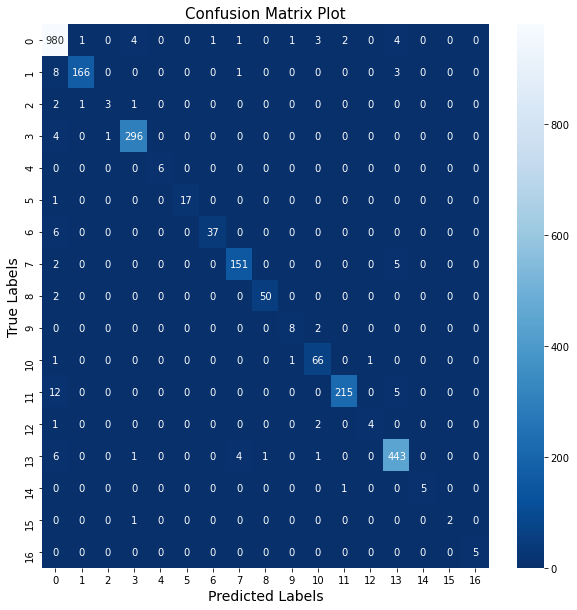

In [18]:
#Final model found in model selection stage
finalmodel = ExtraTreesClassifier(max_depth= None,max_features='log2',min_samples_leaf= 1,min_samples_split= 5,n_estimators= 150)
#Testing result before feature selection
model_evaluation(X_train,X_test,finalmodel)

## 2. Testing Set Result After Feature Selection

In [19]:
#Prepare post-selection DataFrame 
Train_select = functions.drop_column(Train,['hmrc_corp','hmrc_vat','week_of_month_2','balance_std','week_of_month_3','token_length'])
Test_select = functions.drop_column(Test,['hmrc_corp','hmrc_vat','week_of_month_2','balance_std','week_of_month_3','token_length'])
X_train_sel = Train_select.iloc[:,:-1]
X_test_sel = Test_select.iloc[:,:-1]
y_train = Train_select.iloc[:,-1]
y_test = Test_select.iloc[:,-1]

              precision    recall  f1-score   support

           0    0.95424   0.98295   0.96838       997
           1    0.98802   0.92697   0.95652       178
           2    0.75000   0.42857   0.54545         7
           3    0.97705   0.99003   0.98350       301
           4    1.00000   1.00000   1.00000         6
           5    1.00000   0.94444   0.97143        18
           6    0.97297   0.83721   0.90000        43
           7    0.96178   0.95570   0.95873       158
           8    0.98039   0.96154   0.97087        52
           9    0.75000   0.60000   0.66667        10
          10    0.89189   0.95652   0.92308        69
          11    0.97235   0.90948   0.93987       232
          12    0.80000   0.57143   0.66667         7
          13    0.96095   0.97149   0.96619       456
          14    1.00000   0.83333   0.90909         6
          15    1.00000   0.66667   0.80000         3
          16    1.00000   1.00000   1.00000         5

    accuracy              

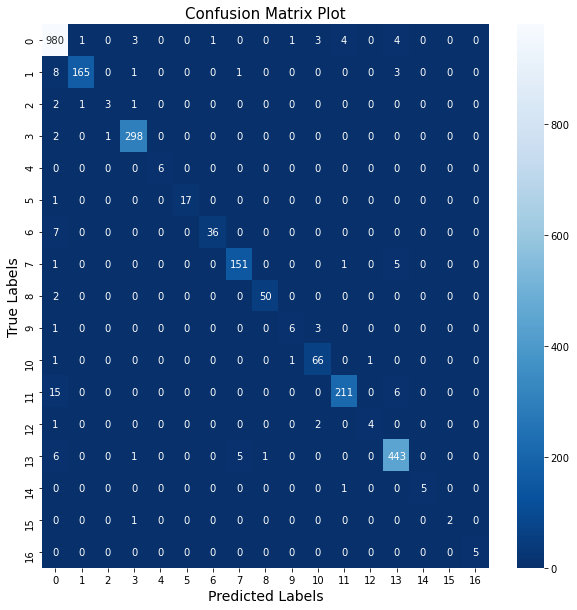

In [20]:
model_evaluation(X_train_sel,X_test_sel,finalmodel)